In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from shapely.geometry import Polygon, LineString, Point, box
import numpy as np

In [2]:
# [(7, 51.2), (7.3, 51.7)]
start_coordinate_input_latitude = float(input("Please input the Start Latitude Coordinate: "))
start_coordinate_input_longitude = float(input("Please input the Start Longitude Coordinate: "))
start_coordinate = (start_coordinate_input_latitude,start_coordinate_input_longitude)
print(start_coordinate)

end_coordinate_input_latitude = float(input("Please input the End Latitude Coordinate: "))
end_coordinate_input_longitude = float(input("Please input the End Longitude Coordinate: "))
end_coordinate = (end_coordinate_input_latitude,end_coordinate_input_longitude)
print(end_coordinate)

Please input the Start Latitude Coordinate: 7
Please input the Start Longitude Coordinate: 51.2
(7.0, 51.2)
Please input the End Latitude Coordinate: 8
Please input the End Longitude Coordinate: 52
(8.0, 52.0)


In [3]:
germany_map = gpd.read_file('C:/Users/Mohamed Gamal/OneDrive/Documents/Uni Freiburg/Semester 2/Electives Seminar/GIS Data/gadm36_DEU_shp/gadm36_DEU_1.shp')

In [4]:
germany_map.head()
germany_map.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
noise_levels_in_cities = gpd.read_file('C:/Users/Mohamed Gamal/OneDrive/Documents/Uni Freiburg/Semester 2/Electives Seminar/GIS Data/DF_4_8_AggRoad_Lden/Aggroad_Lden_17.shp')

In [6]:
noise_levels_in_cities_4326 = noise_levels_in_cities.to_crs("EPSG:4326")
noise_levels_in_cities_4326.head()
#noise_levels_in_cities_4326.sort_values(by=['DB_Low'])
noise_levels_in_cities_4326.columns

Index(['OBJECTID', 'CTRYID', 'UnAggID', 'Agglomerat', 'DB_Low', 'DB_High',
       'Shape_Area', 'Version', 'Stand', 'geometry'],
      dtype='object')

In [7]:
noise_levels_in_cities_4326.sort_values(by=['DB_Low'])

,OBJECTID,CTRYID,UnAggID,Agglomerat,DB_Low,DB_High,Shape_Area,Version,Stand,geometry
0,1,DE,DE_d_ag1,Potsdam,55,59,2.383877e+06,1722_5,20200531,"POLYGON ((13.00251 52.42768, 13.00250 52.42768..."
104857,104858,DE,DE_j_ag5,Duisburg,55,59,1.357420e+05,1722_5,20200531,"POLYGON ((6.77185 51.52457, 6.77192 51.52453, ..."
104856,104857,DE,DE_j_ag5,Duisburg,55,59,3.639159e+05,1722_5,20200531,"POLYGON ((6.79254 51.44256, 6.79268 51.44256, ..."
104855,104856,DE,DE_j_ag5,Duisburg,55,59,2.323216e+05,1722_5,20200531,"POLYGON ((6.67748 51.41858, 6.67754 51.41855, ..."
104854,104855,DE,DE_j_ag5,Duisburg,55,59,1.348703e+05,1722_5,20200531,"POLYGON ((6.65491 51.40132, 6.65506 51.40129, ..."
...,...,...,...,...,...,...,...,...,...,...
86379,86380,DE,DE_j_ag1,Köln,75,0,9.119008e+02,1722_5,20200531,"POLYGON ((7.13032 50.90455, 7.13032 50.90454, ..."
375011,375012,DE,DE_b_ag8,Erlangen,75,0,4.752682e+02,1722_5,20200531,"POLYGON ((11.00815 49.58506, 11.00814 49.58524..."
86378,86379,DE,DE_j_ag1,Köln,75,0,1.409284e+03,1722_5,20200531,"POLYGON ((7.13131 50.90429, 7.13131 50.90428, ..."
86385,86386,DE,DE_j_ag1,Köln,75,0,2.939297e+02,1722_5,20200531,"POLYGON ((7.12716 50.90539, 7.12716 50.90539, ..."


In [8]:
#List all the Points within a specific Polygon
list(noise_levels_in_cities_4326.loc[3].geometry.exterior.coords)
#noise_levels_in_cities_4326.crs

[(13.047895471399015, 52.41123303429382),
 (13.04788091689481, 52.41123315374982),
 (13.047866319271442, 52.41123426063543),
 (13.047851562646256, 52.4112361746707),
 (13.047836768291859, 52.411238986817445),
 (13.04782181313898, 52.411242695979546),
 (13.047810753979512, 52.4112460188274),
 (13.047800171825472, 52.41124953017429),
 (13.04778957440008, 52.41125339988866),
 (13.04777908117925, 52.411257631806116),
 (13.047768585263464, 52.41126195358909),
 (13.04775820523037, 52.411266366881414),
 (13.04774794287656, 52.41127087223105),
 (13.047737800896998, 52.41127537977206),
 (13.047727901462551, 52.41127989060041),
 (13.04771813228385, 52.41128422443637),
 (13.047708496055785, 52.41128829031825),
 (13.04769910955938, 52.41129218085178),
 (13.047689985371061, 52.411295625891555),
 (13.047681114507624, 52.4112988051693),
 (13.047655593370385, 52.41130566565752),
 (13.0476391137765, 52.41130818025637),
 (13.04762379660259, 52.41130909590126),
 (13.047609631967191, 52.411308592871904),


<AxesSubplot:>

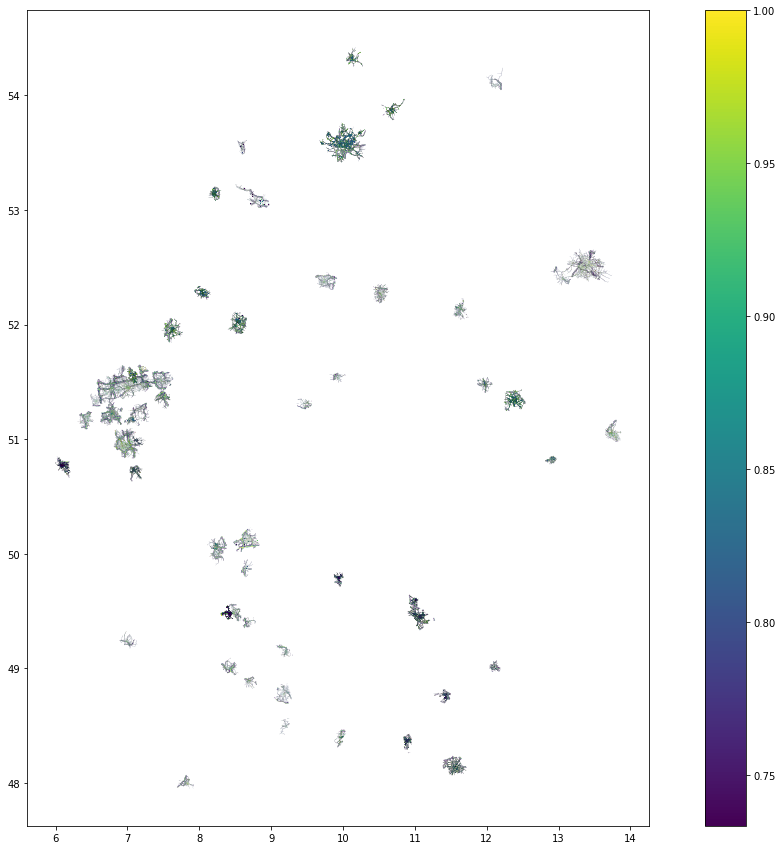

In [9]:
noise_levels_in_cities_4326['Quitest Regions'] = noise_levels_in_cities_4326.DB_Low / 75

noise_levels_in_cities_4326.plot(column='Quitest Regions',figsize=(20,15), legend=True)

<AxesSubplot:>

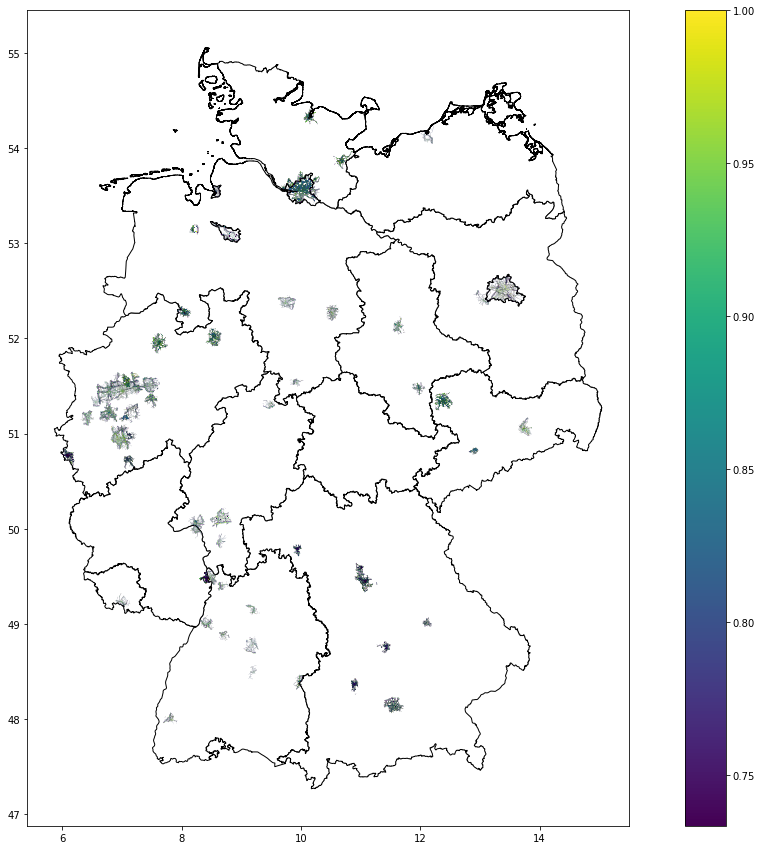

In [10]:
#Create the Figure
fig, ax = plt.subplots(figsize=(20,15))
ax.set_aspect('equal')

#First Layer, Germany Map
germany_map.plot(ax=ax, color='white', edgecolor='black')

#Second Layer, Noise Level in Cities
noise_levels_in_cities_4326.plot(ax=ax, column='Quitest Regions', legend=True)

In [11]:
#Drawing Straight line from origin to destination  
#start_coordinate, end_coordinate = [(7, 51.2), (7.3, 51.7)]
d = {'col1': ['Coordinates'], 'geometry': [LineString([start_coordinate, end_coordinate])]}
gdf_line = gpd.GeoDataFrame(d, crs="EPSG:4326")
gdf_line

,col1,geometry
0,Coordinates,"LINESTRING (7.00000 51.20000, 8.00000 52.00000)"


<AxesSubplot:>

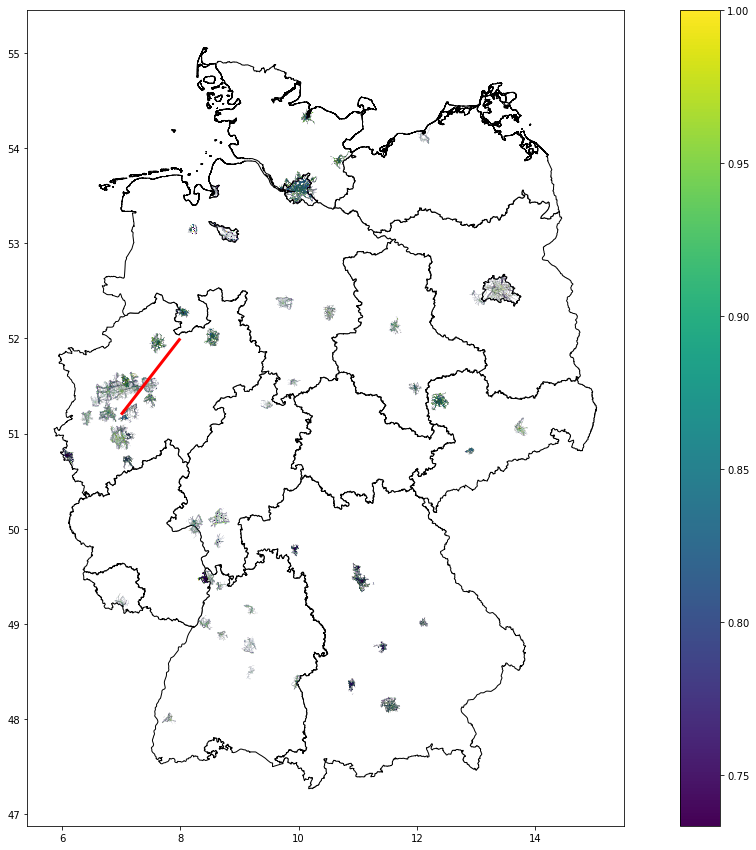

In [12]:
#Create the Figure
fig, ax = plt.subplots(figsize=(20,15))
ax.set_aspect('equal')

#First Layer, Germany Map
germany_map.plot(ax=ax, color='white', edgecolor='black')

#Second Layer, Noise Level in Cities
noise_levels_in_cities_4326.plot(ax=ax, column='Quitest Regions', legend=True)

#Third Layer, Start and End Points
gdf_line.plot(ax=ax, color='red', linewidth=3)

In [13]:
index_intersected_line_with_polygon = gdf_line.geometry.sindex.query_bulk(noise_levels_in_cities_4326.geometry, predicate="intersects")

In [14]:
index_intersected_line_with_polygon[0,:]

array([111467, 111537, 111547, 111556, 111570, 111584, 111585, 111586,
       111625, 111660, 111725, 115335, 115337, 115347, 115360, 115394,
       115724, 115727, 115831, 243442, 243592, 243751, 244111, 246719,
       246839, 248013, 248786, 249482, 407595, 407601, 407603, 407615,
       407624, 407656, 407659, 407681, 407694, 407697, 407710, 407733,
       407810, 407814, 407877, 407908, 407910, 407950, 408108, 408121,
       408166, 408199, 408217, 408547, 408580, 408990, 409785, 410360,
       410367, 410373, 410382, 410385, 410396, 410397, 410399, 410407,
       410417, 410431, 410434, 410456, 410483, 410541, 410562, 410636,
       410788, 410840, 411401, 411414, 411417, 411422, 411424, 411431,
       411441, 411449, 411469, 412142, 412143, 412145, 412175, 412188,
       412222, 412992, 413370], dtype=int64)

In [15]:
#Added Intersected Data to new Dataframe
df_intersected_line_with_polygon = noise_levels_in_cities_4326[noise_levels_in_cities_4326.index.isin(index_intersected_line_with_polygon[0,:])]

In [16]:
df_intersected_line_with_polygon

,OBJECTID,CTRYID,UnAggID,Agglomerat,DB_Low,DB_High,Shape_Area,Version,Stand,geometry,Quitest Regions
111467,111468,DE,DE_j_ag7,Wuppertal,70,74,2.274833e+02,1722_5,20200531,"POLYGON ((7.13302 51.30641, 7.13302 51.30650, ...",0.933333
111537,111538,DE,DE_j_ag7,Wuppertal,60,64,1.446765e+05,1722_5,20200531,"POLYGON ((7.12530 51.30215, 7.12545 51.30215, ...",0.800000
111547,111548,DE,DE_j_ag7,Wuppertal,70,74,9.559487e+04,1722_5,20200531,"POLYGON ((7.09616 51.29214, 7.09602 51.29214, ...",0.933333
111556,111557,DE,DE_j_ag7,Wuppertal,60,64,4.262995e+05,1722_5,20200531,"POLYGON ((7.09586 51.29250, 7.09585 51.29277, ...",0.800000
111570,111571,DE,DE_j_ag7,Wuppertal,60,64,1.920892e+06,1722_5,20200531,"POLYGON ((7.07307 51.26829, 7.07306 51.26847, ...",0.800000
...,...,...,...,...,...,...,...,...,...,...,...
412175,412176,DE,DE_j_ag3,Dortmund,70,75,1.608746e+04,1722_5,20200531,"POLYGON ((7.42868 51.54042, 7.42867 51.54043, ...",0.933333
412188,412189,DE,DE_j_ag3,Dortmund,70,75,1.192697e+04,1722_5,20200531,"POLYGON ((7.44694 51.55480, 7.44692 51.55481, ...",0.933333
412222,412223,DE,DE_j_ag3,Dortmund,70,75,5.077777e+03,1722_5,20200531,"POLYGON ((7.44429 51.55195, 7.44426 51.55197, ...",0.933333
412992,412993,DE,DE_j_ag3,Dortmund,75,0,5.832469e+06,1722_5,20200531,"POLYGON ((7.39276 51.45931, 7.39275 51.45932, ...",1.000000


<AxesSubplot:>

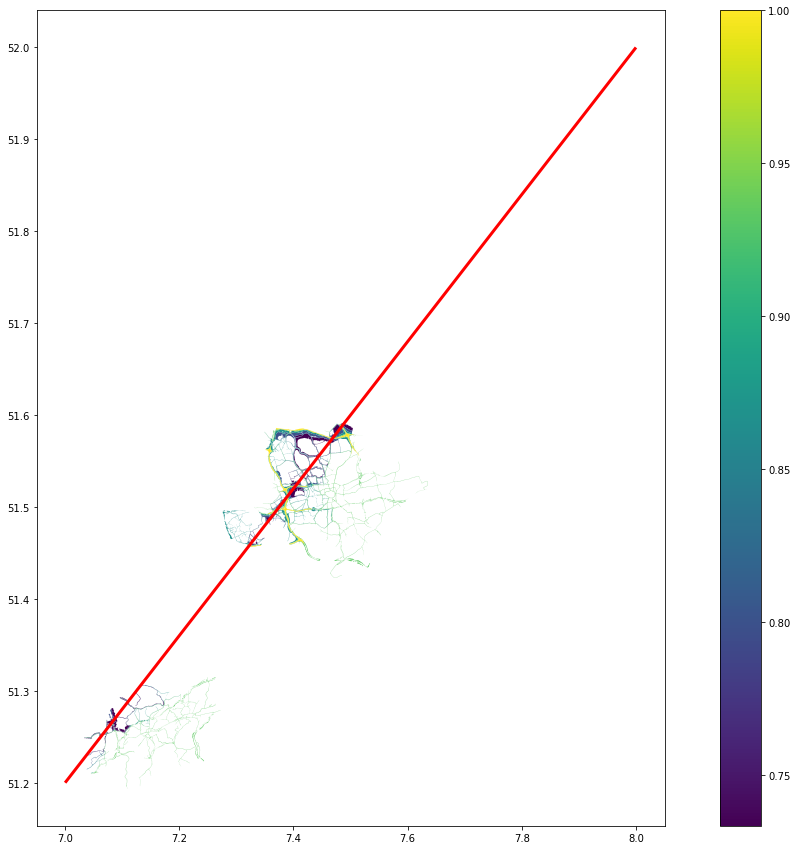

In [17]:
#Create the Figure
fig, ax = plt.subplots(figsize=(20,15))
ax.set_aspect('equal')

#First Layer, Germany Map
#germany_map.plot(ax=ax, color='white', edgecolor='black')

#Second Layer, Noise Level in Cities
df_intersected_line_with_polygon.plot(ax=ax, column='Quitest Regions', legend=True)

#Third Layer, Start and End Points
gdf_line.plot(ax=ax, color='red', linewidth=3)

In [18]:
start_point = gpd.GeoSeries([Point(start_coordinate_input_latitude, start_coordinate_input_longitude)], crs=4326)
start_point = start_point.to_crs(3310)
def calculate_distance(geometry_series):
    return gpd.GeoSeries(geometry_series).distance(start_point)/1000

df_intersected_line_with_polygon = df_intersected_line_with_polygon.to_crs(3310)
df_intersected_line_with_polygon['DistanceToStart'] = df_intersected_line_with_polygon.geometry.apply(calculate_distance)

<ipython-input-18-bb3d2f8d2bf7>:4: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:3310

  return gpd.GeoSeries(geometry_series).distance(start_point)/1000


In [19]:
df_intersected_line_with_polygon['DistanceToStart']

111467    14.937816
111537    12.659265
111547    12.089728
111556    12.114569
111570     7.798540
            ...    
412175    47.798806
412188    49.778276
412222    49.539027
412992    39.745471
413370    49.077548
Name: DistanceToStart, Length: 91, dtype: float64

In [20]:
df_intersected_line_with_polygon_sorted = df_intersected_line_with_polygon.sort_values(by = 'DistanceToStart')

In [21]:
df_intersected_line_with_polygon_sorted[-20:]

,OBJECTID,CTRYID,UnAggID,Agglomerat,DB_Low,DB_High,Shape_Area,Version,Stand,geometry,Quitest Regions,DistanceToStart
413370,413371,DE,DE_j_ag3,Dortmund,75,0,3.253199e+06,1722_5,20200531,"POLYGON ((6651384.469 6784564.516, 6651380.286...",1.000000,49.077548
410417,410418,DE,DE_j_ag3,Dortmund,60,64,1.431956e+05,1722_5,20200531,"POLYGON ((6651678.997 6780416.636, 6651677.819...",0.800000,49.339585
407659,407660,DE,DE_j_ag3,Dortmund,55,59,2.183275e+05,1722_5,20200531,"POLYGON ((6651637.485 6780415.160, 6651635.532...",0.733333,49.345512
412222,412223,DE,DE_j_ag3,Dortmund,70,75,5.077777e+03,1722_5,20200531,"POLYGON ((6650672.727 6779543.572, 6650670.168...",0.933333,49.539027
412188,412189,DE,DE_j_ag3,Dortmund,70,75,1.192697e+04,1722_5,20200531,"POLYGON ((6650417.763 6779798.334, 6650416.360...",0.933333,49.778276
407601,407602,DE,DE_j_ag3,Dortmund,55,59,2.294692e+06,1722_5,20200531,"POLYGON ((6650426.972 6779891.672, 6650425.517...",0.733333,49.931458
411414,411415,DE,DE_j_ag3,Dortmund,65,69,1.130190e+06,1722_5,20200531,"POLYGON ((6650342.080 6781218.111, 6650341.001...",0.866667,51.053680
410385,410386,DE,DE_j_ag3,Dortmund,60,64,6.480092e+05,1722_5,20200531,"POLYGON ((6650319.970 6781165.200, 6650318.402...",0.800000,51.064545
408580,408581,DE,DE_j_ag3,Dortmund,55,59,9.595156e+02,1722_5,20200531,"POLYGON ((6649064.484 6781285.978, 6649062.952...",0.733333,51.901276
412145,412146,DE,DE_j_ag3,Dortmund,70,75,5.711846e+05,1722_5,20200531,"POLYGON ((6648733.014 6782143.514, 6648732.052...",0.933333,51.920189


<AxesSubplot:>

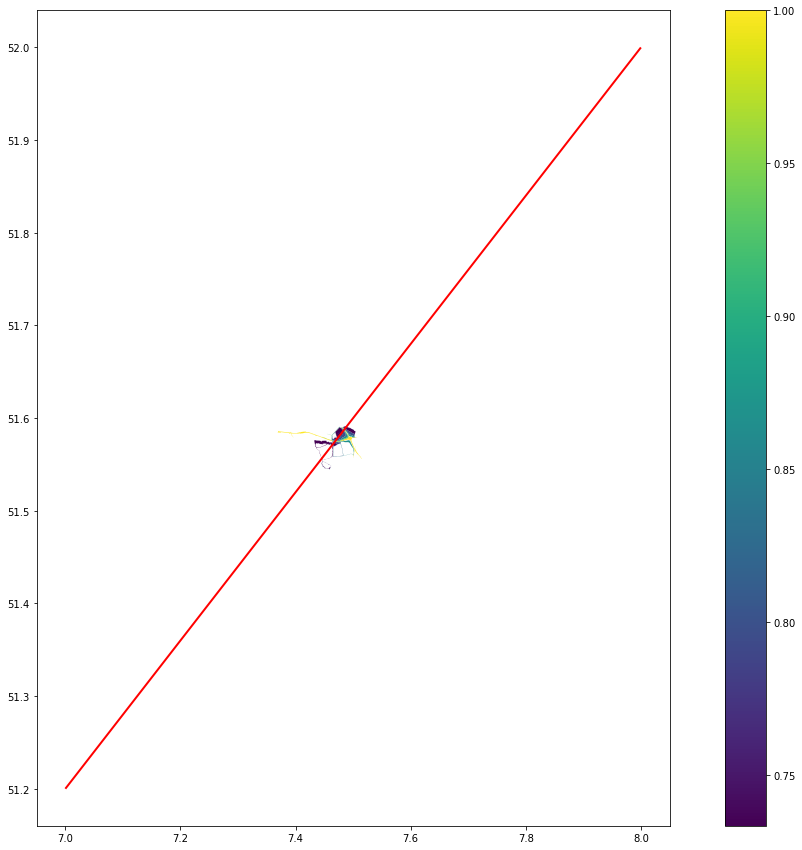

In [22]:
#Create the Figure
f, ax = plt.subplots(figsize=(20,15))
ax.set_aspect('equal')

#print(df_intersected_line_with_polygon_sorted.crs)

#First Layer, Germany Map
#germany_map.plot(ax=ax, color='white', edgecolor='black')

#Second Layer, Noise Level in Cities
df_intersected_line_with_polygon_sorted.to_crs(4326)[-20:].plot(ax=ax, column='Quitest Regions', legend=True)

#Third Layer, LineString
gdf_line.plot(ax=ax, color='red', linewidth=2)

In [23]:
#Assigning Altitudes based on Noise level (dB)

def calculate_altitude(db_low):
    if db_low <= 75 and db_low > 73:
        return 50/3280.8
    elif db_low <= 73 and db_low > 60.5:
        return 250/3280.8
    else:
        return 500/3280.8
df_intersected_line_with_polygon_sorted['Altitude'] = df_intersected_line_with_polygon_sorted.DB_Low.apply(calculate_altitude)

In [24]:
#df_intersected_line_with_polygon_sorted['Altitude'].to_list()

In [25]:
#df_intersected_line_with_polygon_sorted['DistanceToStart'].to_list()

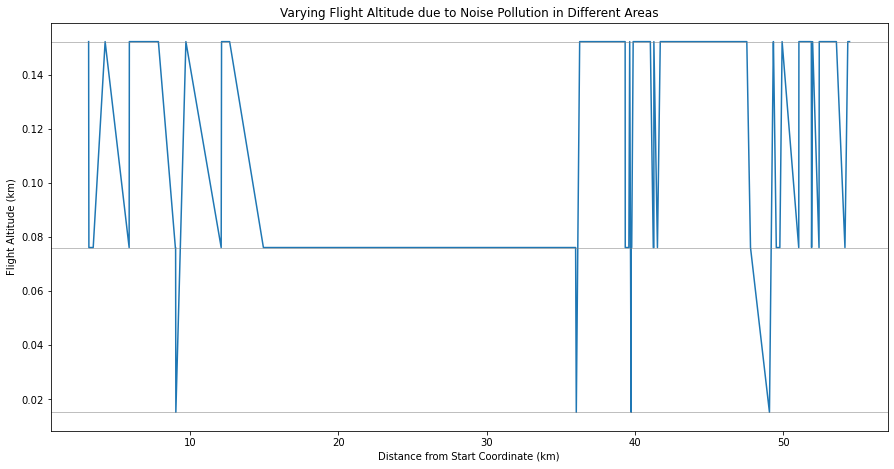

In [26]:
fig, ax = plt.subplots(figsize=(15, 7.5))

plt.plot(df_intersected_line_with_polygon_sorted['DistanceToStart'].to_list(), df_intersected_line_with_polygon_sorted['Altitude'].to_list())
#ax.set_yticks([0, 50, 250, 500], minor=False)
ynew = 50/3280.8
ax.axhline(ynew, color='gray', linewidth=0.5)
ynew1 = 250/3280.8
ax.axhline(ynew1, color='gray', linewidth=0.5)
ynew2 = 500/3280.8
ax.axhline(ynew2, color='gray', linewidth=0.5)
plt.xlabel('Distance from Start Coordinate (km)')
plt.ylabel('Flight Altitude (km)')
plt.title('Varying Flight Altitude due to Noise Pollution in Different Areas')
plt.show()

In [27]:
#Quietest Area across the UAM's Path:
print("The Quietest Area that the UAM passes through has a DB Level of {} dB".format(df_intersected_line_with_polygon.sort_values(by = 'DB_Low').iloc[0].DB_Low))

The Quietest Area that the UAM passes through has a DB Level of 55 dB


In [28]:
for i in df_intersected_line_with_polygon_sorted.index:
    print("VTOL passing by \033[1m{}\033[0m \033[1m{} km\033[0m from start location with a ground noise pollution level of \033[1m{} dB\033[0m should fly at a minimum altitude of \033[1m{} ft\033[0m".format(df_intersected_line_with_polygon_sorted.loc[i].Agglomerat,df_intersected_line_with_polygon_sorted.loc[i].DistanceToStart,df_intersected_line_with_polygon_sorted.loc[i].DB_Low,df_intersected_line_with_polygon_sorted.loc[i].Altitude))

VTOL passing by Wuppertal 3.146345526276226 km from start location with a ground noise pollution level of 60 dB should fly at a minimum altitude of 0.152401853206535 ft
VTOL passing by Wuppertal 3.164556914480704 km from start location with a ground noise pollution level of 65 dB should fly at a minimum altitude of 0.0762009266032675 ft
VTOL passing by Wuppertal 3.4553632081445875 km from start location with a ground noise pollution level of 70 dB should fly at a minimum altitude of 0.0762009266032675 ft
VTOL passing by Wuppertal 4.259786496125545 km from start location with a ground noise pollution level of 55 dB should fly at a minimum altitude of 0.152401853206535 ft
VTOL passing by Wuppertal 5.880184145278173 km from start location with a ground noise pollution level of 65 dB should fly at a minimum altitude of 0.0762009266032675 ft
VTOL passing by Wuppertal 5.894153972106232 km from start location with a ground noise pollution level of 60 dB should fly at a minimum altitude of 0.1

In [29]:
df_intersected_line_with_polygon_sorted.columns

Index(['OBJECTID', 'CTRYID', 'UnAggID', 'Agglomerat', 'DB_Low', 'DB_High',
       'Shape_Area', 'Version', 'Stand', 'geometry', 'Quitest Regions',
       'DistanceToStart', 'Altitude'],
      dtype='object')

In [30]:
#import geopy.distance
#dist = geopy.distance.geodesic((38.8459879,117.454361),(38.846255,117.459880))
#dist.meters